In [ ]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NOAA-GFDL/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20)  # Adjust based on your CPU coresl ="https://raw.githubusercontent.com/NOAA-GFDL/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"


let us load the data

In [2]:
cat = intake.open_esm_datastore(url)
cat

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


let us extract GFDL-OM4p5B OMIP data from the main dataset.

it seems that there are 2 separate member_ids, let us separate the two.

In [19]:
GFDL_OM4p5B_filtered_vol = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-OM4p5B',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['dissic', 'no3', 'ph', 'so', 'chl', 'pp']
)
GFDL_OM4p5B_filtered_vol.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
2,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,chl,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
3,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,so,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701


In [20]:
GFDL_OM4p5B_filtered_area = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-OM4p5B',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['dpco2', 'fgco2', 'intdic', 'phos', 'spco2']
)
GFDL_OM4p5B_filtered_area.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,fgco2,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701


In [21]:
GFDL_OM4p5B_filtered_norm = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-OM4p5B',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['zsatarag', 'talk']
)
GFDL_OM4p5B_filtered_norm.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,talk,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701


In [22]:
GFDL_OM4p5B_filtered_cello = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-OM4p5B',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['areacello', 'volcello']
)
GFDL_OM4p5B_filtered_cello.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,volcello,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701


let us now load all the actual data.

In [23]:
dset_dict_vol = GFDL_OM4p5B_filtered_vol.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_area = GFDL_OM4p5B_filtered_area.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
# dset_dict_norm = GFDL_OM4p5B_filtered_norm.to_dataset_dict(
#     xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
# )
dset_dict_cello = GFDL_OM4p5B_filtered_cello.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)

#setting up volcello and areacello
temp = dset_dict_cello['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Ofx.gr']
areas = temp['areacello']
temp = dset_dict_cello['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr']
volumes = temp['volcello'].isel(lev=0)
total_volume = volumes.sum(dim=['lat', 'lon'])
total_area = areas.sum(dim=['lat', 'lon'])

#loading other data
vol_data = dset_dict_vol['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr']
area_data = dset_dict_area['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr']
# norm_data = dset_dict_norm['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


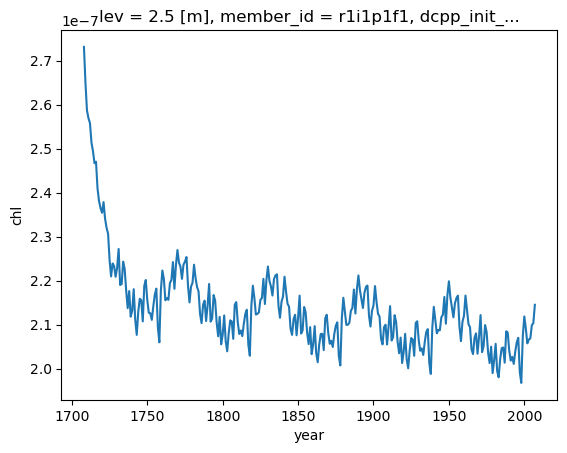

In [ ]:
for var in vol_data.data_vars.values():
    try:
        ((var.isel(lev=0) * volumes).sum(dim=['lat', 'lon']) / total_volume).groupby('time.year').mean().plot()
    
    except:
        ((var.isel(lev_partial=0) * volumes).sum(dim=['lat', 'lon']) / total_volume).groupby('time.year').mean().plot()
    
    plt.ylabel(var.name)
    plt.show()

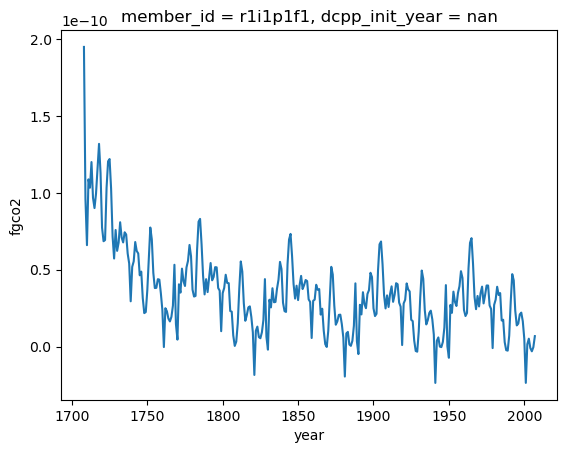

ValueError: Dimensions {'lev_partial'} do not exist. Expected one or more of ('lat', 'lon')

In [ ]:
#creates an unknown error, error can be ignored as it does not impact function of code

for var in area_data.data_vars.values():
    try:
        ((var.groupby('time.year').mean() * areas).sum(dim=['lat', 'lon']) / total_area).plot()
    except:
        ((var.isel(lev_partial=0).groupby('time.year').mean() * areas).sum(dim=['lat', 'lon']) / total_area).plot()
    
    
    plt.ylabel(var.name)
    plt.show()